In [245]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [246]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [247]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [248]:
# Create X matrix of regressor variables
X = df.drop(['DEATH_EVENT'], axis = 1)

In [249]:
# Create y vector of regressand variable DEATH_EVENT
y = df['DEATH_EVENT']

In [250]:
ratio_death = df[df["DEATH_EVENT"] == 1].DEATH_EVENT.sum() / df.DEATH_EVENT.count()
print(f"Verhältnis positiver vs negativer Ausprägungen in der Zielvariable: {ratio_death}")

Verhältnis positiver vs negativer Ausprägungen in der Zielvariable: 0.3210702341137124


In [251]:
# Hiobs Datengrundlage 

In [252]:
##split
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns='time'), y , test_size=0.33, random_state=3)

##standardize (around 71% acc on val set)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)




### 1. Durchgang: Ursprüngliche Daten (standardisiert)

In [253]:
rf = RandomForestClassifier()

In [254]:
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

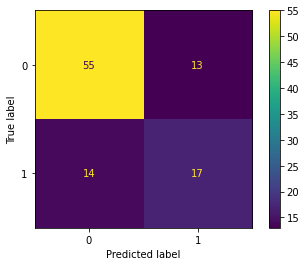

In [255]:
plot_confusion_matrix(rf, X_test_sc, y_test) 

### 2. Durchgang: SMOTE Upsampling Daten

In [256]:
#Experiment: SMOTE UPSAMLING

oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train_sc, y_train)

print(f"Neues Verhältnis nach SMOTE Anwendung:{y_train_sm[y_train_sm == 1].sum() / len(y_train_sm)}")


Neues Verhältnis nach SMOTE Anwendung:0.5


In [257]:
rf_sm = RandomForestClassifier()
rf_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

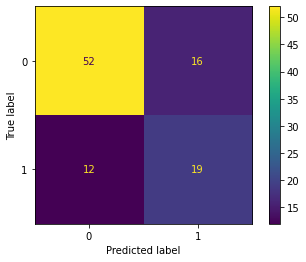

In [258]:
plot_confusion_matrix(rf_sm, X_test_sc, y_test);

### 3. Durchgang: PCA Daten

In [259]:
pca = PCA(n_components=5)
X_train_pca = pd.DataFrame(data = pca.fit_transform(X_train_sc), columns=['pc1','pc2','pc3','pc4','pc5'])
X_test_pca = pd.DataFrame(data = pca.transform(X_test_sc), columns=['pc1','pc2','pc3','pc4','pc5'])

In [260]:
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train)

RandomForestClassifier()

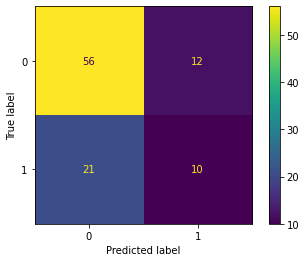

In [261]:
plot_confusion_matrix(rf_pca, X_test_pca, y_test);

### 4. Durchgang: Beste Datengrundlage und Hyperparameter Tuning

In [230]:
grid = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [231]:
rf_tune = RandomForestClassifier()
rf_tune = GridSearchCV(rf_tune, grid, cv=3)
rf_tune.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]})

In [232]:
print(rf_tune.best_params_)
print(rf_tune.best_estimator_)

{'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 100}
RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=5)


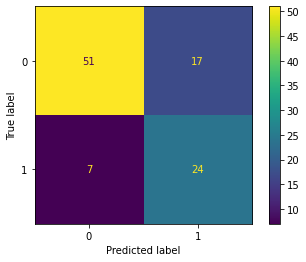

In [262]:
plot_confusion_matrix(rf_tune, X_test_sc, y_test);

ToDo: ROC-AUC Kurve 

In [263]:
from sklearn.metrics import plot_roc_curve

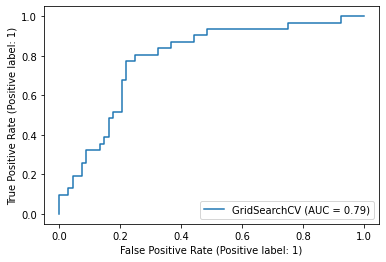

In [267]:
plot_roc_curve(rf_tune, X_test_sc, y_test);

ToDo: Classification-Tree + Visualisierung dessen (https://www.kaggle.com/pratikmungekar/tree-random-forest-with-heart-failure-prediction) 

ToDo: Linear Discriminant Analysis (https://machinelearningmastery.com/linear-discriminant-analysis-with-python/#:~:text=The%20hyperparameters%20for%20the%20Linear%20Discriminant%20Analysis%20method,values%20for%20solvers%20that%20support%20the%20shrinkage%20capability, https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) 